# <font color='Blue'>Linear Regression</font>

## <font color='Blue'>Objectives</font>
   1. Understand the concept of simple linear regression and its applications in predictive analytics
   2. Build simple linear regession models using python packages
   3. Apply Regression Diagnostics
   4. Perform model validation tasks and make predictions
   
### <font color='Blue'>References</font>
   1. Machine Learning Using Python,Pradhan Manaranjan and U Dinesh Kumar, Wiley Publications
   2. Applied Multivariate Statistical analysis, Sixth Edition, Richard A Johnson, Dean W Wichern
   3. Internet sources, for pictures, under fair use policy
      https://towardsdatascience.com/linear-regression-explained-1b36f97b7572

## <font color='Blue'>Contents</font>   

  ### <font color='Blue'>1. What is Simple Linear Regression</font>
  ### <font color='Blue'>2. Building Simple Linear Regression Model</font>
     STEP 1: Collect, Extract, Analyze Data
     STEP 2: Processing Data
     STEP 3: Dividing data into training and validation datasets
     STEP 4: Build the model
     STEP 5: Perform mode diagnostics
     STEP 6: Measure model accuracy and validate model
     STEP 7: Make Predictions
  ### <font color='Blue'>3. Model Diagnostics</font>
      a. Coefficient of determination (R-Squared)
      b. Concept of Hypothesis test for regression coefficient 
      c. Conceptual relation to ANOVA
      c. Regression Model Summary Using Python
      e. Residual Analysis (LINE Principle)
         (i)   Linearity
         (ii)  Independence of residuals
         (iii) Normality of residuals
         (iv)  Equality of variance of residuals
      f. Outlier Analysis
         (i)   Z-Score
         (ii)  Cook's distance
         (iii) Leverage Values

## <font color='Blue'>1. What is Simple Linear Regression</font>

  Simple Linear Regression is a statistical technique for finding the existence of an associaton relationship between a 
  dependent variable (aka response variable or outcome variable) and an independent variable (aka explanatory variable,  
  predictor variable or feature). We can only establish the changes in the value of outcome variable with respect to a  
  explantory variable, ie, regression techinique cannot be used for causal relationship between variables.
  
  Regression is one of the most popular supervised learning algorithms in predictive analytics. A regression model requires the   knowledge of both the outcme and the feature vaiables in the training dataset.
  
### <font color='Blue'>Regression Examples</font>
  1. A hospital may be interested in finding how the total cost of a patient for a treatment varies with the body weight of the 
     person
  2. Insurance companies would like to understand the association between healthcare costs and ageing
  3. An organization may be interested in finding the relationship between revenue generated from a product and features such 
     as price, money spent on promotion, competitor's price and promotion expenses.
  4. Restaurants would like to know the association between customer waiting times and revenues
  5. E-commerce company like to know the relationship between revenues and features like
     (a) Number of customer visits to their portal
     (b) Number of clicks on products
     (c) Number of items on sale
     (d) Average discount percentage
  6. Banks and financial institutions would like to understand the impact of variables such as unemployment rate, marital 
     status, balance in bank account and rainfall on the percentage of non-performing assets (NPA). <br>
     
### <font color='Blue'>Mathematical Background</font>
 
#### <font color='Blue'>Functional Form of SLR</font>
      Y = β0 + β1.X + ε                                             
      [Response] = [mean value depending on X] + error               
      Linear refers to the fact that mean is a linear function of unknown parameters β0 and β1.
      ε = y - β0 - β1.X
        
<img src="Regression_Line.jpg" width="500" height="600">
 
#### <font color='Blue'>Regression Objective</font>
      Let the number of samples be n                    
      Minimize sum of squared residuals                  
      Minimize  ∑(yi - ŷi)^2 over i=1 to i=n    
                where ŷi = β0 + β1.X                    
                yi is the actual value of y             
                ŷi is the predicted value of y           
      Minimize  ∑(yi - β0 - β1.Xi)^2 over i=1 to i=n     
      by finding β0 and β1 that minimizes the above equation
      
#### <font color='Blue'>Regression Properties</font>
      In eqn form:     Y = β0 + β1.X + ε  
      In matrix form: [Y] = [β][X] + [ε]
                     (nx1)  (nx(r+1) (nx1)
      where n is the number of samples
            r is the number of predictors
      E(ε) = 0
      Var(ε) = constant    
      Relation between Y and X is linear
      Residuals are independen
      
<img src="Regression_Matrix.jpg"  width="300" height="400">
      
####  <font color='Blue'>Regression Properties to be tested (Diagnostics)</font>
1. Linearity        - The relationship between y and x is linear
2. Independence     - The errors are independent of each other (not correlated, especially in a time series)
3. Normality        - The errors (aka residuals) εi follow a normal distribution with mean(ε) = 0
4. Homoscedasticity - The variance var(ε) is constant for different values of X. When var(ε) is constant, it in known as homoscedasticity. When var(ε) is not constant, it is heteroscedasticity   

<img src="Regression_Assumptions.jpg"  width="500" height="600">

## <font color='Blue'>2. Building a Simple Linear Regression Model</font>

A dataset contain the salary of 50 graduating MBA students of a Business School in 2016 and their Class X percentage marks. Develop a model to understand and predict salary based on Class X percentage marks.

### <font color='Blue'>Steps in building a regression model</font>
     STEP 1: Collect, Extract, Analyze Data
     STEP 2: Processing Data
     STEP 3: Dividing data into training and validation datasets
     STEP 4: Build the model
     STEP 5: Perform mode diagnostics
     STEP 6: Measure model accuracy and validate model
     STEP 7: Make Predictions

#### <font color='Green'>STEP 1: Collect, Extract, Analyze Data</font>

In [1]:
# Loading Data

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 

# Setting pandas print option to limit decimal places to 4
np.set_printoptions(precision=4, linewidth=100) 

mba_salary_df = pd.read_csv( 'MBA Salary.csv' )

In [2]:
mba_salary_df.head( 10 )

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [3]:
mba_salary_df.info()

# Look for Missing data, Handle if any
# Handle Categorical Variables if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


#### <font color='Green'>STEP 2: Process Data</font>

In [4]:
# Creating Feature Set and Outcome Variable
import statsmodels.api as sm

X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] )
print("Feature Set")
print(X.head(10))

Feature Set
   const  Percentage in Grade 10
0    1.0                   62.00
1    1.0                   76.33
2    1.0                   72.00
3    1.0                   60.00
4    1.0                   61.00
5    1.0                   55.00
6    1.0                   70.00
7    1.0                   68.00
8    1.0                   82.80
9    1.0                   59.00


In [5]:
print("Outcome Variable")
Y = mba_salary_df['Salary']
print(Y.head(10))

Outcome Variable
0    270000
1    200000
2    240000
3    250000
4    180000
5    300000
6    260000
7    235000
8    425000
9    240000
Name: Salary, dtype: int64


#### <font color='Green'>STEP 3: Dividing data into training and validation datasets</font>

In [6]:
# Splitting the dataset into training and validation sets

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X , Y, train_size = 0.8, random_state = 100 )

In [7]:
# Datatypes

print("train_X")
print(train_X.info())
print("___________________________________________________________________")
print("test_X")
print(test_X.info())
print("___________________________________________________________________")
print("train_y",type(train_y))
print(len(train_y))
print("___________________________________________________________________")
print("test_y",type(test_y))
print(len(test_y))

train_X
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 8
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   40 non-null     float64
 1   Percentage in Grade 10  40 non-null     float64
dtypes: float64(2)
memory usage: 960.0 bytes
None
___________________________________________________________________
test_X
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 6 to 42
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   10 non-null     float64
 1   Percentage in Grade 10  10 non-null     float64
dtypes: float64(2)
memory usage: 240.0 bytes
None
___________________________________________________________________
train_y <class 'pandas.core.series.Series'>
40
___________________________________________________________________
test_y 

#### <font color='Green'>STEP 4: Build the model</font>

In [8]:
mba_salary_lm = sm.OLS( train_y, train_X ).fit()

In [9]:
# Display the model
print( mba_salary_lm.params )

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [10]:
# Model in mathematical form
print("y = 30587.28 + 3560*Percentage in Grade 10")

y = 30587.28 + 3560*Percentage in Grade 10


#### <font color='Green'>Complete Code</font>

  #### <font color='Green'>Model Summary</font>
  
  #### <font color='Green'>Coefficient of Determination (R2) </font>
  
  The objective of regression is to explain the variation in Y using the knowledge of X. The coefficient of determination R2
  (R-Squared) measures the percentage of variation of Y explained by the model. The variation in Y can be split into
  1. Explained variance (Variance explained by the model)
  2. Unexplained variace (Unexplained Variance)
  
  Var(Y) = Explained Variance + UnExplained Variance <br>
  Total sum of squared errors (TSS) = Expained sum of squared errors (ESS) + Residual (Error) Sum of Squares (RSS) <br>
  TSS = RSS + ESS
  ∑(yi -  y̅)^2 =  ∑(ŷi -  y̅)^2 + ∑(yi -  ŷi)^2 <br>
  
  TSS      : Squared and Summed difference between actual    y and mean y       (yi and y̅) <br>
  ESS      : Squared and Summed difference between predicted y and mean y       (ŷi and y̅) <br>
  RSS      : Squared and Summed difference between actual    y and predicted y  (yi and ŷi <br>
  
<img src="R_Square.jpg"  width="700" height="800">
  
  R-Squared = 1 - RSS/TSS <br>
  
  Properties of R-Squared 
  (a) Lies between 0 and 1
  (b) It is squae of pearson correlation coefficient
  (c) Higher R-Squared indicates a better fit (but be careful)  
  
  In MLR, Adjusted R-Squared = 1 - (1-R^2)(N-1)/(N-P-1) to account for too many predictors
  
  
  #### <font color='Green'>Hypothesis Testing</font>
  The regression coefficient β captures the existence of a linear relationship between the outcome variable and the feature.
  If β=0, then there is no statistically significant relationship
  
  H0: βi = 0
  HA: βi ≠ 0
  
  Interpret by examining the p-value related to the t-test of β
  Standard error is the standard deviation of β
  
  #### <font color='Green'>Anova</font>
  The overall validity of the regression model is given by F-Statistic
  Interpret the p-value related to the F-Statistic
  H0: βi = 0
  HA: Not all β = 0
  
  
  #### <font color='Green'>Model Simplicity</font>
  AIC And BIC values are model quality measures. When comparing two different models, lower the AIC and BIC, the better the 
  model is.
  
  <img src="Regression_Summary.jpg"  width="700" height="800">

In [11]:
mba_salary_lm.summary2()

# R-squared is 0.211, model explains 21.1% of the variance in y
# p-value of t-test of β1 is < 0.05, so β1 is statistically significant
# p-value of F-test of the model is < 0.05, so the model is statistically significant

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2021-07-21 12:04      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

 #### <font color='Green'>Step 5: Perform Model Diagnostics</font>

#### <font color='Green'>5.1: Perform Model Diagnostics: Linearity of Relationship</font>

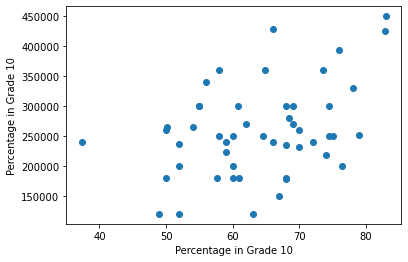

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.scatter(x = mba_salary_df['Percentage in Grade 10'], y = mba_salary_df['Salary']);
plt.xlabel('Percentage in Grade 10');
plt.ylabel('Percentage in Grade 10');

<b> Scatterplot will help you to check if the relationship is linear. <br>
We can conclude that relationship looks linear </b>

#### <font color='Green'>5.2: Perform Model Diagnostics: Independence of Residuals</font>

How do we check this?
    This is hard to check. If the data is naturally chronological, then the plot of residuals over time may be observed for any specific pattern. Usually, in time-series data, Durbin-Watson Test may be used for assess the independence of time-series data. <br>
    
<b> Durbin Watson Test: </b> <br>
The Durbin Watson Test is a measure of autocorrelation (also called serial correlation) in residuals from regression analysis. Autocorrelation is the similarity of a time series over successive time intervals. The Durbin Watson test reports a test statistic, with a value from 0 to 4, where: <br>

    A. 2 is no autocorrelation <br>
    B. 0 to <2 is positive autocorrelation (common in time series data) <br>
    C. >2 to 4 is negative autocorrelation (less common in time series data) <br>
    Usually value of 1.5 to 2.5 is considered acceptable. <br>
    
In our case, the data is not time series, so we assume independence of residuals.

#### <font color='Green'>5.3: Perform Model Diagnostics: Normality of Residuals</font>

To check for normality, obtain the standardized residuals and check for normality using QQ plot.

<b> Obtaining Residuals </b>

In [13]:
mba_salary_resid = mba_salary_lm.resid

<b> Standardising Residuals </b>

In [14]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
mba_salary_resid_std = get_standardized_values( mba_salary_resid )

<b> What happens in standardisation </b>

In [15]:
print("Mean of Residuals: ",mba_salary_resid.mean())
print("Std Dev of Residuals: ",mba_salary_resid.std())
print("Mean of Standardized Residuals: ",mba_salary_resid_std.mean())
print("Std Dev of Standardized Residuals: ",mba_salary_resid_std.std())

Mean of Residuals:  -8.076312951743602e-11
Std Dev of Residuals:  69882.50841421106
Mean of Standardized Residuals:  3.3306690738754695e-17
Std Dev of Standardized Residuals:  0.9999999999999999


<b> QQ plot of standardised residuals </b>

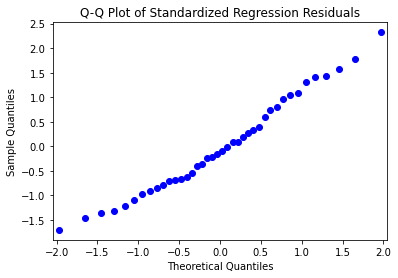

In [16]:
sm.qqplot(mba_salary_resid_std) 
plt.title( "Q-Q Plot of Standardized Regression Residuals" );

<b> QQ plot shows that residuals are normal </b>

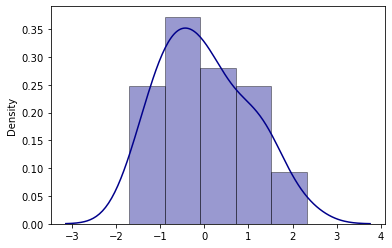

In [17]:
# Density Plot
sn.distplot(mba_salary_resid_std, color = 'darkblue',hist_kws={'edgecolor':'black'});

<b> Density plot shows normal distribution </b>

#### <font color='Green'>5.4: Perform Model Diagnostics: Homoscedasticity of residuals</font>

The homoscedasticity can be observed by a drawing a residual plot, which is a plot between standardised residual value 
and standardized predicted value. The plot must be random and any pattern (especially fan-shape) indicates 
heteroscedasticity

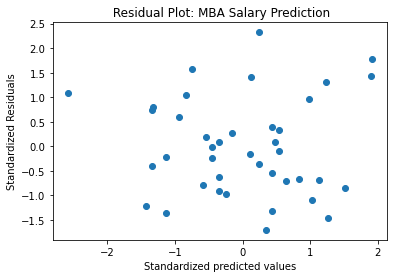

In [18]:
mba_salary_fittedvalues_std = get_standardized_values( mba_salary_lm.fittedvalues )
plt.scatter( mba_salary_fittedvalues_std, mba_salary_resid_std )
plt.title( " Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

<b> Plot shows that residuals are random and doesnot show any pattern. So residuals are homoscedastic </b>

<b> How Residual plots should not look ? See below </b>

<img src="Residual_Plots.jpg"  width="700" height="800">

#### <font color='Green'>Remedies from Multivariate Data Analysis, Seventh Edition, Hair et al., Pearson publication</font>

Normality can have serious effects in small samples (fewer than 50 cases), but the impact effectively diminishes when sample sizes reach 200 cases or more

Most cases of heteroscedasticity are a result of nonnormality in one or more variables; thus, remedying normality may not be needed due to sample size, but may be needed to equalize the variance. Heteroscedasticity can be remedied by the transformation of the dependent variable in a dependence relationship; if a heteroscedastic relationship is also nonlinear, the dependent variable, and perhaps the independent variables, must be transformed

Nonlinear relationships can be well defined, but seriously understated unless the data are transformed to a linear pattern or explicit model components are used to represent the nonlinear portion of the relationship

Weighted linear regression model may used to handle heteroscedasticity. Model may also be respecified.

Transformations may change the interpretation of the variables; for example, transforming variables by taking their logarithm translates the relationship into a measure of proportional change (elasticity); always be sure to explore thoroughly the possible interpretations of the transformed variables

#### <font color='Green'>5.5: Perform Model Diagnostics: Influencer Analysis</font>

Outliers are observations whose values show a large deviation from the mean value. Presence of an outlier can have a 
significant influence on the values of regression coefficients. Thus it is important to understand the existence of outliers 
in the data. Following measures can be used to identify influential observations.
  
  1. Z-Score
  2. Cook's distance
  3. Leverage values

<b> Z-Score </b> <br>
Any observation witha Z-Score of more than 3 can be flagged as an outlier. <br>
We donot find any outliers based on Z-Score

In [19]:
from scipy.stats import zscore
mba_salary_df['z_score_salary'] = zscore( mba_salary_df.Salary )
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary < -3.0) ]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


<b> Cook's Distance </b> <br>

Cook's distance measures how much the predicted value of the dependent variable changes for all the observations in the sample when a particular observation is excluded from the sample for the estimation of regression parameters. A Cook's distance value of > 1 indicates highly influential observation.

No influential variables as per Cooks Distance

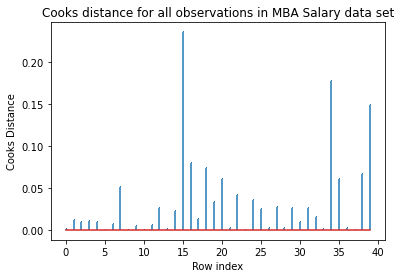

In [20]:
mba_influence = mba_salary_lm.get_influence()
(c, p) = mba_influence.cooks_distance
plt.stem( np.arange( len( train_X) ), np.round( c, 3 ), markerfmt="," );
plt.title( "Cooks distance for all observations in MBA Salary data set" );
plt.xlabel( "Row index")
plt.ylabel( "Cooks Distance");

<b> Leverage Values </b> <br>

Leverage value of an observation measures the influence of an observation on the overall regression model.It is related to
Mahalanobis distance. Leverage values of more than 3(k+1)/n is treated as highly influential variable, where k is the 
number of features in the model and n is the sample size.

Larger the circle, higher is the leverage
Observations 12, 13, 8, 15 of training data set have high leverage
These observations can be dropped from training

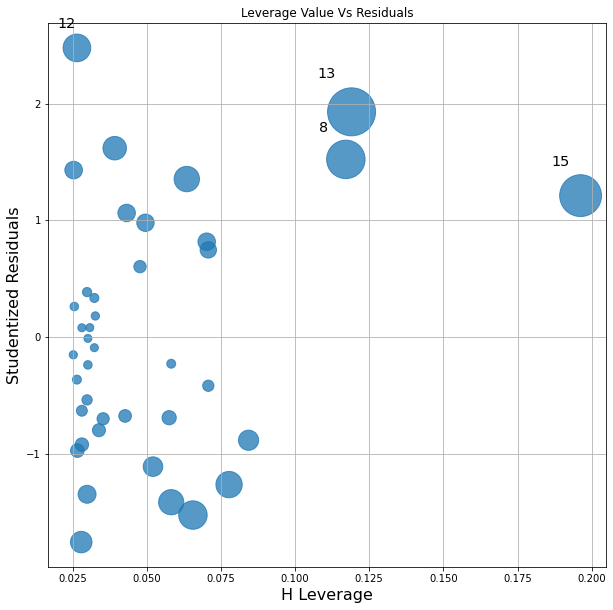

In [21]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(10, 10))
fig = influence_plot(mba_salary_lm, ax=ax)
plt.title( "Leverage Value Vs Residuals")
plt.grid()

#### <font color='Green'>Step 5: Measure model accuracy and validate model</font>

<b> Making predictions in validation set </b>

In [22]:
pred_y = mba_salary_lm.predict( test_X )
round(pred_y,2)

6     279828.40
36    272707.23
37    215737.83
28    237101.35
43    295851.05
49    247071.00
5     226419.59
33    308313.10
20    254904.29
42    295494.99
dtype: float64

<b> Finding R-Square and RMSE </b>

In [23]:
from sklearn.metrics import r2_score, mean_squared_error
rsquare_train = round(np.abs(r2_score(train_y,mba_salary_lm.fittedvalues)),4)
rsquare_valid = round(np.abs(r2_score(test_y,pred_y)),4)

import numpy
rmse_train = round(np.sqrt(mean_squared_error(train_y,mba_salary_lm.fittedvalues)),4)
rmse_valid = round(np.sqrt(mean_squared_error(pred_y,test_y)),4)

print("R-Square_Train: ", rsquare_train, " RMSE_Train: ", rmse_train)
print("R-Square_Valid: ", rsquare_valid, " RMSE_Valid: ", rmse_valid)

R-Square_Train:  0.211  RMSE_Train:  69003.4482
R-Square_Valid:  0.1566  RMSE_Valid:  73458.0435


#### <font color='Green'>Step 6: Making Predictions</font>

In [24]:
predictions = mba_salary_lm.get_prediction(test_X)
predictions_df = round(predictions.summary_frame(alpha=0.05),2)

# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'grade_10_perc': test_X['Percentage in Grade 10'],
                            'test_y': test_y,
                            'pred_y': predictions_df['mean'],
                            'pred_y_left': predictions_df['obs_ci_lower'],
                            'pred_y_right': predictions_df['obs_ci_upper'],
                            'pred_interval_size':predictions_df['obs_ci_upper']-predictions_df['obs_ci_lower']} )
pred_y_df

,grade_10_perc,test_y,pred_y,pred_y_left,pred_y_right,pred_interval_size
6,70.0,260000,279828.40,134000.16,425656.65,291656.49
36,68.0,177600,272707.23,127260.89,418153.57,290892.68
37,52.0,236000,215737.83,68302.61,363173.04,294870.43
28,58.0,360000,237101.35,91458.13,382744.58,291286.45
43,74.5,250000,295851.05,148658.29,443043.80,294385.51
49,60.8,300000,247071.00,101837.28,392304.72,290467.44
5,55.0,300000,226419.59,80034.71,372804.47,292769.76
33,78.0,330000,308313.10,159585.70,457040.50,297454.80
20,63.0,120000,254904.29,109799.23,400009.35,290210.12
42,74.4,300000,295494.99,148340.06,442649.91,294309.85
